In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [20]:
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
def grab_col_names(dataframe,cat_upper_limit=10 ,cardinal_lower_limit = 20): 
    """ 
    This function helps to determine types of columns. Numerical,Categorical,Cardinal 
    Parameters: dataframe = DataFrame 
    cat_upper_limit = upper limit of categorical columns's number of unique ->values 10 inital value
    cardinal_lowe_limit = lower limit to classify a column as cardinal -> 20 initial value
    Return: 
    cat_cols: includes categorical names but also includes encoding columns or has less unique value than cat_lower_limit
    num_cols: includes  names of numerical columns 
    cardinal_cols : includes names of cardinal columns.In other words,columns which does not carry information. 
    """  
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_upper_limit and 
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > cardinal_lower_limit and 
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
 
    return cat_cols,num_cols,cat_but_car

In [5]:
cat_cols,num_cols,cardinal_cols = grab_col_names(df)

In [6]:
def printColsTypes(num_cols,cat_cols,cardinal_cols):
    print(cat_cols,"\n", num_cols,"\n",cardinal_cols)

In [7]:
printColsTypes(num_cols,cat_cols,cardinal_cols)

['diagnosis'] 
 ['id', 'Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'] 
 []


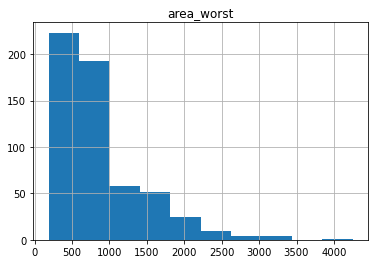

In [11]:
df["area_worst"].hist() 
plt.title("area_worst") 
plt.show()

In [12]:
df.groupby("diagnosis").agg({"area_worst": ["mean","median","sum","max","min"]})

area_worst                                 
                  mean  median       sum     max    min
diagnosis                                              
B           558.899440   547.4  199527.1  1210.0  185.2
M          1422.286321  1303.0  301524.7  4254.0  508.1

## Correlation Matrix

<AxesSubplot:>

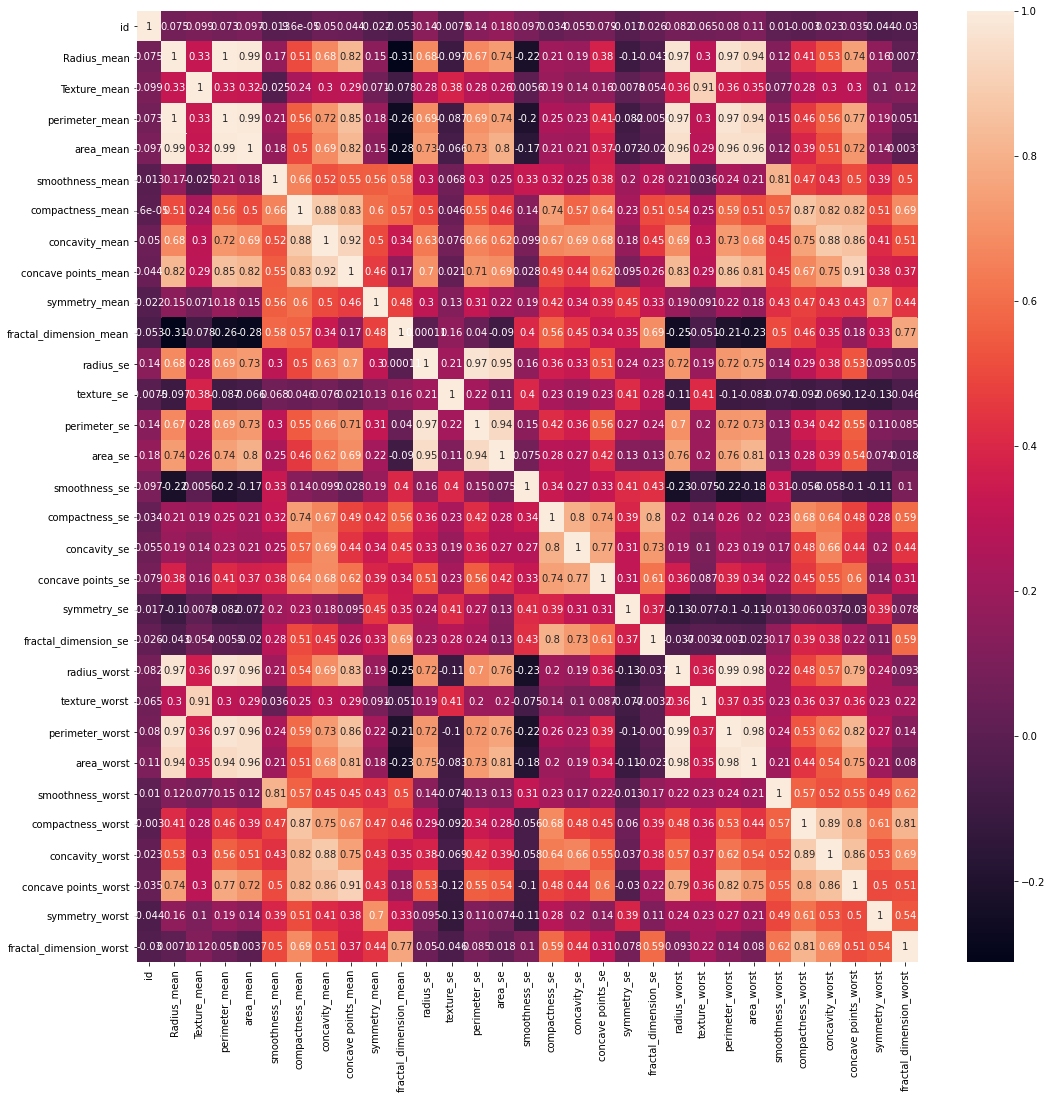

In [14]:
corr = df.corr()  
fig, ax = plt.subplots(figsize=(17.5,17.5)) 
sns.heatmap(corr,annot=True)

In [15]:
def Drop_High_Corr(df,corr_level=0.80) : 
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than cor level
    to_drop = [column for column in upper.columns if any(upper[column] > corr_level)]

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)

In [16]:
len(df.columns)

32

In [21]:
Drop_High_Corr(df,corr_level=0.80)

In [22]:
len(df.columns)

15

# Feature Engineering

In [23]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

In [24]:
cat_col,num_col,car_col = grab_col_names(df)

In [25]:
printColsTypes(num_col,cat_col,car_col)

['diagnosis'] 
 ['id', 'Radius_mean', 'Texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'symmetry_worst'] 
 []


## Scaling 

In [26]:
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])
df.head()

,id,diagnosis,Radius_mean,Texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,-0.236405,M,1.097064,-2.074594,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.660820,1.148757,2.750622
1,-0.236403,M,1.829821,0.575454,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,0.260162,-0.805450,-0.243890
2,0.431741,M,1.579888,0.454469,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,1.424827,0.237036,1.152255
3,0.432121,M,-0.768909,0.252050,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,1.115007,4.732680,6.046041
4,0.432201,M,1.750297,-1.153243,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,1.144205,-0.361092,-0.868353


## Outliers

In [27]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [28]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [29]:
for col in num_col: 
    print(check_outlier(df,col))

True
False
False
False
False
False
False
True
True
True
False
True
True
False


In [31]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [33]:
for col in num_col: 
    replace_with_thresholds(df,col,q1=0.10,q3=0.90)

In [34]:
for col in num_col: 
    print(check_outlier(df,col))

False
False
False
False
False
False
False
False
False
False
False
False
False
False


## Encoding

In [35]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [36]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [37]:
df = label_encoder(df,cat_col)

In [38]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,-0.236405,1,1.097064,-2.074594,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.660820,1.148757,2.750622
1,-0.236403,1,1.829821,0.575454,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,0.260162,-0.805450,-0.243890
2,0.431741,1,1.579888,0.454469,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,1.424827,0.237036,1.152255
3,0.432121,1,-0.768909,0.252050,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,1.115007,4.732680,6.046041
4,0.432201,1,1.750297,-1.153243,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,1.144205,-0.361092,-0.868353


## Feature Extraction

## Missing Values(Null Values) 